In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, f1_score, classification_report
import seaborn as sns

In [4]:
# change this file_path to match your dataset location
data_path = r"C:\Users\Beeko\A_Z Handwritten Data.csv"
print("Loading dataset...")
data = pd.read_csv(data_path, header=None)
print("Finished dataset loading")

Loading dataset...
Finished dataset loading


################################## Data exploration and preparation ######################################
Number of unique classes: 26
Classes: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25]
Class Counts: [13870  8668 23409 10134 11440  1163  5762  7218  1120  8493  5603 11586
 12336 19010 57825 19341  5812 11566 48419 22495 29008  4182 10784  6272
 10859  6076]
Dataset loaded successfully, Total images: 372451
Image data normalized successfully!


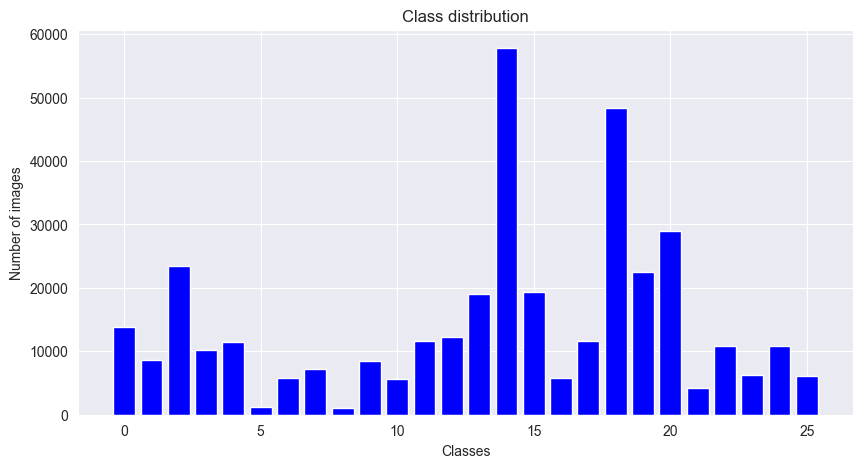

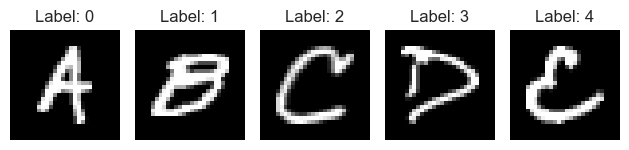

In [5]:

print("################################## Data exploration and preparation ######################################")
# Extract labels and images
labels = data.iloc[:, 0].values
images = data.iloc[:, 1:].values

unique_classes, class_count = np.unique(labels, return_counts=True)
print(f"Number of unique classes: {len(unique_classes)}")
print(f"Classes: {unique_classes}")
print(f"Class Counts: {class_count}")

# Plot the distribution
plt.figure(figsize=(10, 5))
plt.bar(unique_classes, class_count, color='blue')
plt.xlabel('Classes')
plt.ylabel('Number of images')
plt.title('Class distribution')
# plt.show() # uncomment if you want to see :)

# Reshape the image data to 28x28
images = images.reshape(-1, 28, 28)
print(f"Dataset loaded successfully, Total images: {len(images)}")

# Normalize the images
images = images / 255.0
print("Image data normalized successfully!")


unique_labels = np.unique(labels)
plt.figure()
for i, label in enumerate(unique_labels[:5]):  # Visualize first 5 unique classes
    idx = np.where(labels == label)[0][0]      # Get the first index of the label
    plt.subplot(1, 5, i + 1)
    plt.imshow(images[idx], cmap="gray")
    plt.title(f"Label: {label}")
    plt.axis("off")

plt.tight_layout()
plt.savefig("images.png")                      # uncomment if you want to save :)

In [7]:
print("################################## Starting First experiment... ######################################")

# Flatten the images for SVM input
images_flattened = images.reshape(images.shape[0], -1)

# Split the data into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(
    images_flattened, labels, test_size=0.25, random_state=42, stratify=labels)

################################## Starting First experiment... ######################################


In [8]:
# Train linear SVM
print("Training linear SVM...")
linear_svm = SVC(kernel='linear', random_state=42)
linear_svm.fit(X_train, y_train)

Training linear SVM...


SVC(kernel='linear', random_state=42)

In [9]:
def evaluate_model(model, x_test, y_test, kernel_name):
    y_pred = model.predict(x_test)
    cm = confusion_matrix(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')

    print(f"\n{kernel_name} Kernel")
    print("Confusion Matrix:")
    print(cm)
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    print(f"F1-Score: {f1}\n")

    # Plot confusion matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
    plt.title(f"Confusion Matrix ({kernel_name} Kernel)")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()



Evaluating SVM Linear ...

Linear Kernel
Confusion Matrix:
[[ 3230     4     2     1     7     0     2    61     0     3     6     2
     46    27     3    13     5    22     4     2    11     0     4     4
      9     0]
 [    9  1973     9    19    16     0     5     2     0     8     2     4
      4     5    34     4     4    13    42     0     4     0     0     4
      1     5]
 [    3    17  5535     3    57     2    22     2     0     1     5    29
      2     2   113    13     1     6     5     4    24     0     3     0
      3     0]
 [    4    32     5  2203     0     0     0     1     0    17     1     2
      1     4   223    15     1     0    10     0    11     0     0     0
      0     3]
 [    7    43   110     0  2540     7    11     1     0     2    17    15
      1     4     8     4     8    32    24     3    11     0     2     2
      1     7]
 [    1     0     0     0     7   275     0     0     0     0     0     0
      0     0     0     2     0     0     1     4   

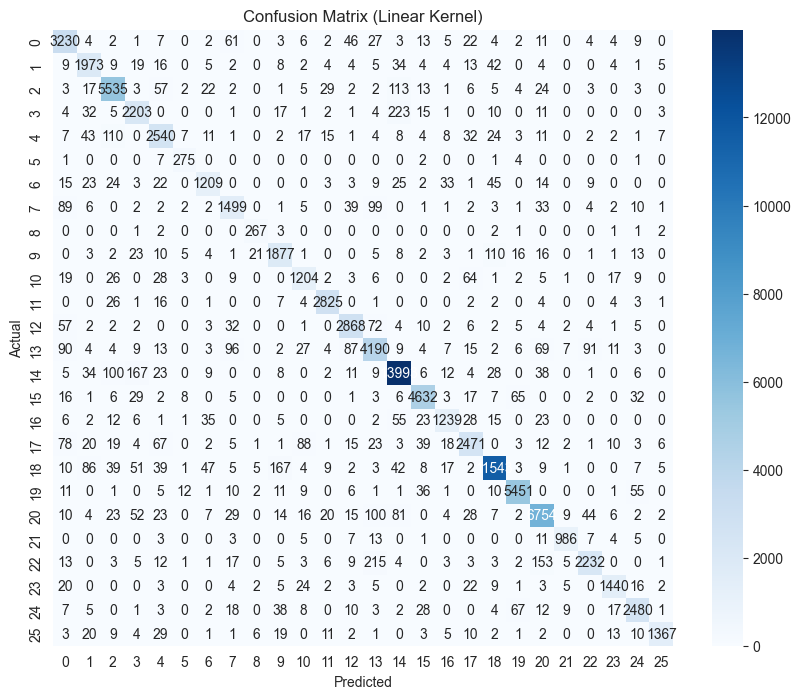

In [10]:
# Evaluate linear SVM
print("Evaluating SVM Linear ...")
evaluate_model(linear_svm, X_test, y_test, "Linear")

In [11]:
# Train RBF SVM
print("Training RBF SVM...")
rbf_svm = SVC(kernel='rbf', random_state=42)
rbf_svm.fit(X_train, y_train)

Training RBF SVM...


SVC(random_state=42)

Evaluating SVM Linear ...

RBF Kernel
Confusion Matrix:
[[ 3426     1     0     2     1     0     1     8     0     0     0     2
      7     5     2     4     0     1     0     2     3     0     1     1
      1     0]
 [    5  2116     1     9     0     0     1     0     0     0     0     0
      1     0     9     1     1    14     4     0     1     0     1     0
      1     2]
 [    1     0  5763     0     8     0     1     0     0     2     1    18
      0     2    31     5     0     1     1     3    13     0     2     0
      0     0]
 [    4     3     0  2408     0     0     0     0     0     8     0     4
      0     1    92     3     2     0     2     0     6     0     0     0
      0     0]
 [    1     5    41     0  2773     3     8     0     0     1     1     3
      1     0     1     0     1     7     5     2     1     0     1     0
      2     3]
 [    0     0     0     1     4   279     0     0     0     0     1     0
      0     0     0     3     0     0     1     1     0

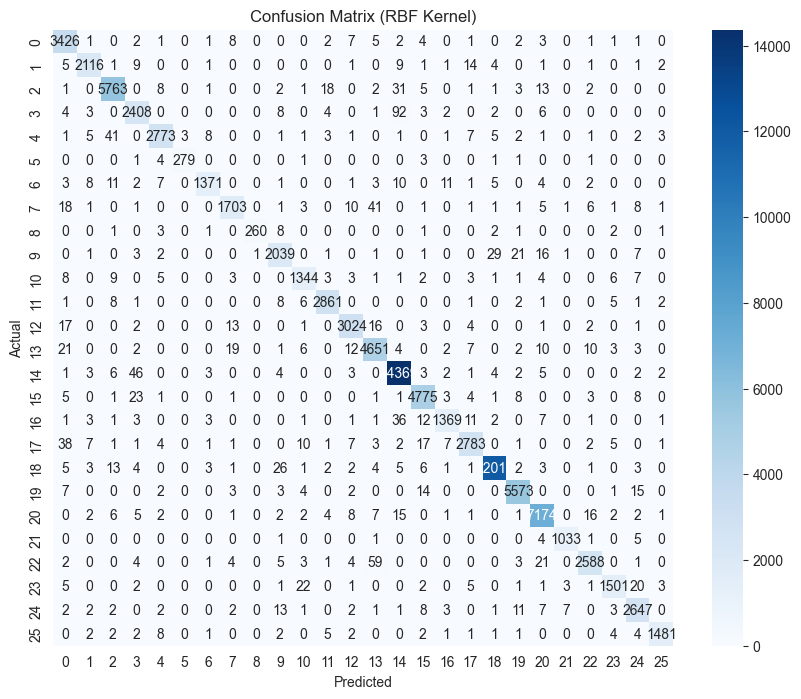

In [12]:
# Evaluate RBF SVM
print("Evaluating SVM Linear ...")
evaluate_model(rbf_svm, X_test, y_test, "RBF")